## Customer Segmentation Analysis Part 2

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [2]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [3]:
rfm = rfm[['recency', 'frequency', 'monetary']]

In [4]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


<AxesSubplot:>

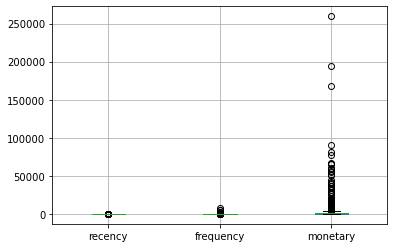

In [5]:
# Create box plots to check for outliers
rfm.boxplot()

In [6]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [7]:
rfmclean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code

Ans: The z-score is being used to normalize the data as well as removing all the outliers. Here we are usuing the 3 as the z-score as it encompasses 99.7% of all the values in a normalized data set. Thus, all values which have a z-score greater than 3 can be considered as outliers.

In [8]:
rfm.shape

(3921, 3)

In [9]:
rfmclean.shape

(3868, 3)

### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:>

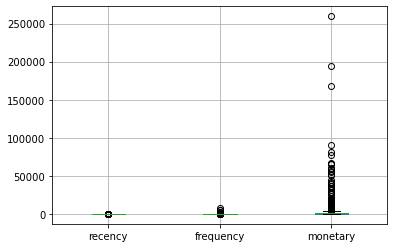

In [10]:
rfm.boxplot()

<AxesSubplot:>

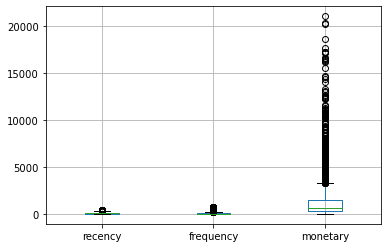

In [11]:
rfmclean.boxplot()

Ans: Though there is a reduction in the number of outliers for recency, frequency and monetary there are still ouliers left for all 3 of them. Furthermore, monetary has a lot of ouliers still left

### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

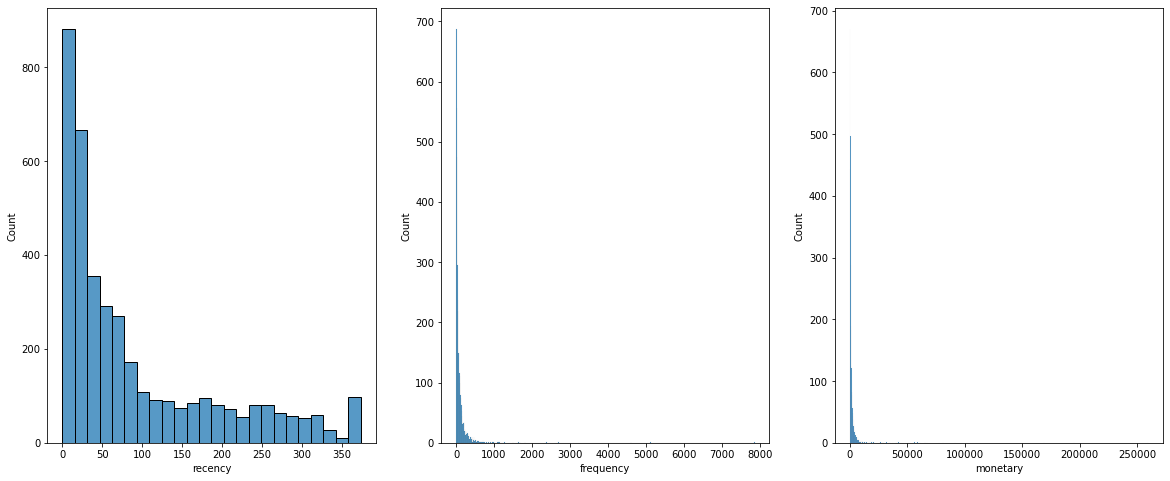

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.histplot(rfm['recency'], ax=ax1)
sns.histplot(rfm['frequency'], ax=ax2)
sns.histplot(rfm['monetary'], ax=ax3)
plt.show()

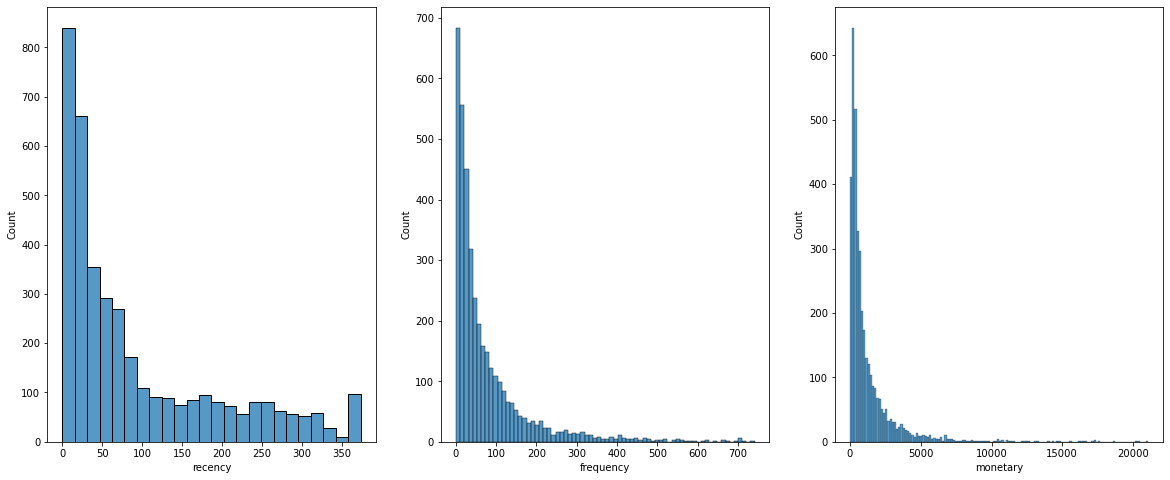

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
sns.histplot(rfmclean['recency'], ax=ax1)
sns.histplot(rfmclean['frequency'], ax=ax2)
sns.histplot(rfmclean['monetary'], ax=ax3)
plt.show()

Ans: When comparing the graphs we see that:

    -> Recency: When comparing th 2 graphs we dont see much diffrence between both the alean data as well as the data before cleaning.
    -> Frequency: There has been a huge change as now after cleaning the data the frewuency has reduce to data poins between 0 and about 750 which is a huge change from the non-clean data set as they had data points from 0 to nearly 80,000.
    -> Monetary: There has also been a huge change in this feature after cleaning as the data ponts became 0 to about 25,000 from 0 to about 200,000 from the data before cleaning.

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [14]:
X = rfm

In [15]:
X.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


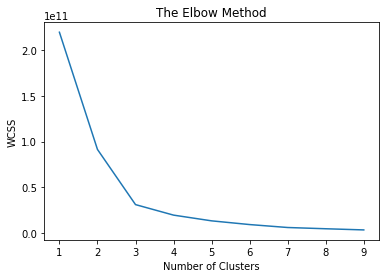

In [16]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)


In [18]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 0])

In [19]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [20]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12346.0,325,1,77183,2
12747.0,2,103,4196,0
12748.0,0,4596,33719,2
12749.0,3,199,4090,0
12820.0,3,59,942,0


# Plot the Graphs

C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


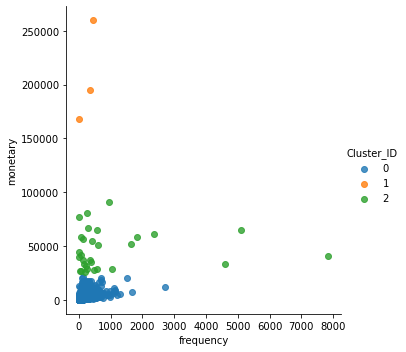

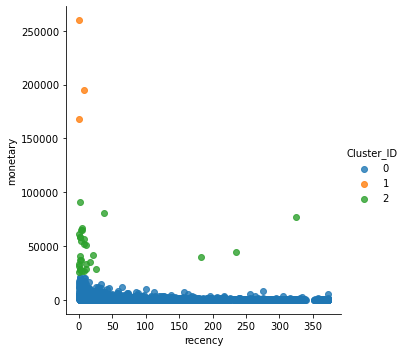

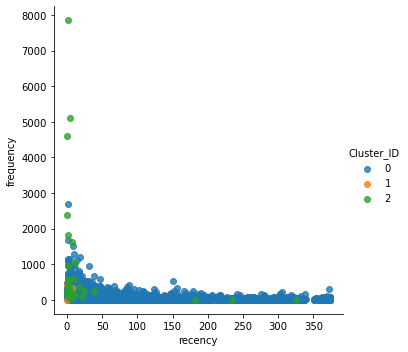

In [21]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Comment on the plots

Ans: The following graphs compare recency, frequency and monetary and tries to cluster the various clusters.

    -> Frequency and Monetary: Here we can see that is a relation between both factors while clutering as the first cluster consists of people with frequency between 0 and 3000 as well as moetary values between o and 20000. The second cluster of people has a frequency value between 0 and 8000 as well as a monetary value from about 20000 to about 100000. and the final cluster is composes of all the other values.
    -> Recency and Monetary: Here we can see that the clusters are based on monetary as all values between 0 and about 25000 in moetary fall under 1 cluster. This is followed by another cluster from 25000 to 100,000 and finall all monetary values above this are classifed under one cluster. Thus, here we can say that the system of classification is completely based on monetary and not on recency.
    -> Recency and Frequency: Here we can see that there is almost no cluster 2 and there is no clear definition of how the clusters are created as all 3 of the clusters are overlaping with each other at various points in the plot.

### Q. Perform Cluster Analysis with k=4

In [22]:
# Fitting K Means to the Datatset using k = 4
X1 = X.copy()
rfm1 = rfm.copy()
kmean1 = KMeans(n_clusters = 4)
y_kmeans1 = kmean1.fit_predict(X1)

In [23]:
# Adding cluster ID to the dataframe
rfm1['Cluster_ID'] = y_kmeans1

C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


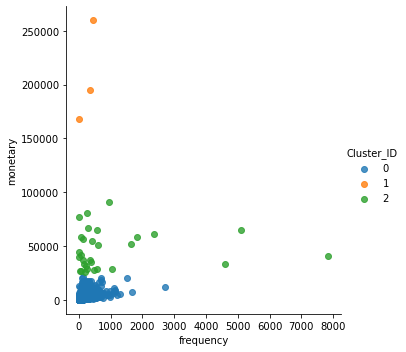

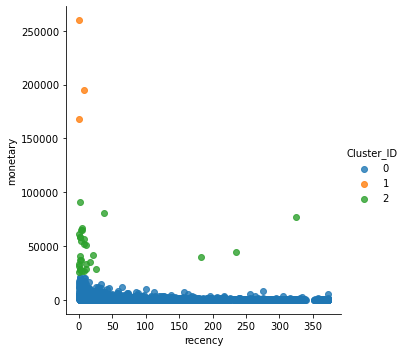

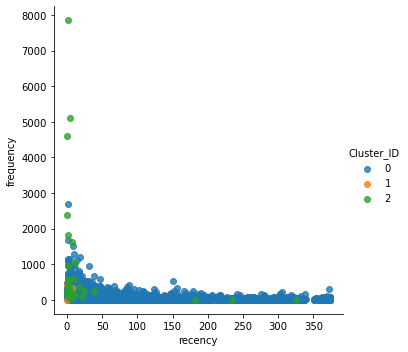

In [24]:
# Create a plot for frequency vs monetary 
facet4 = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet5 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet6 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Ans: The following graphs compare recency, frequency and monetary and tries to cluster the various clusters.

    ->Frequency and Monetary:Here we can see that the clusters are based on monetary as all values between 0 and about 1000 in moetary fall under 1 cluster. Cluster 2 is filled with customers who have a moetary value between about 1000 and about 25000. This is followe by a cluster where the moeatrv value between about 25000 and 100000 and finall, the last cluster consists of all other values. Thus, here in the 4 cluster method we see that the classification is bases on the monetary factors unlike the 3 cluster method where there was a mix of both frequency and monetary
    -> Recency and Monetary: The classification is competly based on metary similary to what happened when using 3 clusters. Furthermore the classfication of the clusters is very simlar to the Frequency and Monetary plot(i.e. cluster1: 0 to about 1000, cluster2: about 1000 to about 25000, cluster3: about 25000 to about 100000 and cluster 4: all the remaining values).
    -> Recency and Frequency: Simlarly to when using 3 clusters there is a lot od overlap between th datapoins and thus is is dificult to understand what are the criteria for this clustering. Furtermore, cluster 2 in this case is non-existsant.

### Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [26]:
X2 = rfmclean

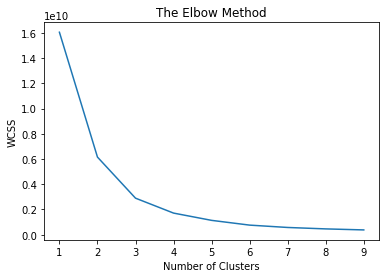

In [27]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
# Fitting K Means to the Datatset using k = 4

kmeans2 = KMeans(n_clusters = 4)
y_kmeans2 = kmeans2.fit_predict(X2)

In [29]:
y_kmeans2

array([2, 2, 0, ..., 0, 0, 2])

In [30]:
# Adding cluster ID to the dataframe
rfmclean['Cluster_ID'] = y_kmeans2

<ipython-input-30-56a6ca4a6826>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmclean['Cluster_ID'] = y_kmeans2


In [31]:
rfmclean.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,2
12749.0,3,199,4090,2
12820.0,3,59,942,0
12821.0,214,6,92,0
12822.0,70,46,948,0


C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


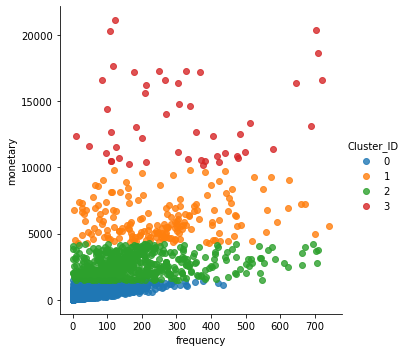

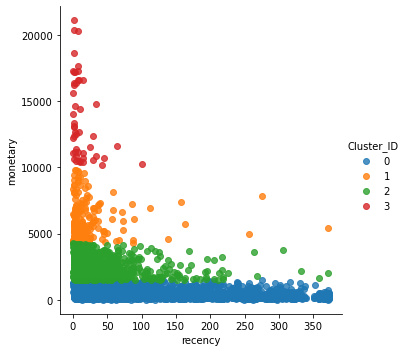

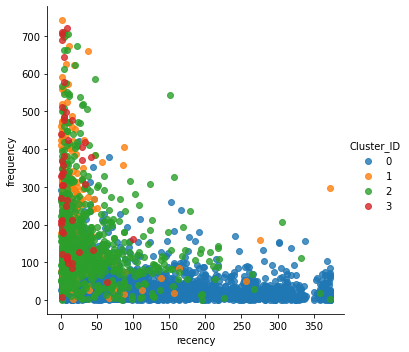

In [32]:
# Create a plot for frequency vs monetary 
facet7 = sns.lmplot(data=X2, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet8 = sns.lmplot(data=X2, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet9 = sns.lmplot(data=X2, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Ans: The following graphs compare recency, frequency and monetary and tries to cluster the various clusters.

    ->Frequency and Monetary: Similar to the non-clean data wit 4 clusters the classification here is done based on the monetary values(i.e. cluster1:0 to about 2000, cluster2: about 2000 to about 5000, cluster 3: about 5000 to about 10000 and finally cluster 4: all values above 10000.).
    -> Recency and Monetary: Similar to frequence and monetary this plaot is also clusted based on the monitay values(i.e. cluster1:0 to about 1000, cluster2: about 1000 to about 4500, cluster 3: about 4500 to about 10000 and finally cluster 4: all values above 10000.).
    -> Recency and Frequency: There is a lot of overlap with the custers in this plot. Thus, making it hard to identify on what basis the clusters wer made.

# Calculate mean for every cluster 

In [33]:
for i in range(4):
    rfmclean_mean = rfmclean.groupby(['Cluster_ID']).mean()
rfmclean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,111.828888,41.618982,527.140630
1,24.631285,259.463687,6089.318436
2,40.734396,157.006640,2459.543161
3,12.346939,313.959184,13655.081633


## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [34]:
# Import the libraries
import scipy.cluster.hierarchy as sch

In [ ]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [36]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)

In [37]:
X2['Cluster_ID'] = y_hc

<ipython-input-37-76ca5ad53682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['Cluster_ID'] = y_hc


In [38]:
X2.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,0
12749.0,3,199,4090,0
12820.0,3,59,942,0
12821.0,214,6,92,0
12822.0,70,46,948,0


### Q. Create all the three plots again. Do you observe any differences from k-means clustering method

C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\sanke\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


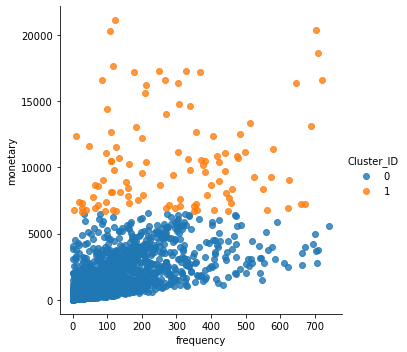

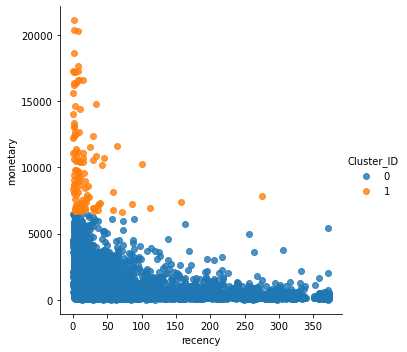

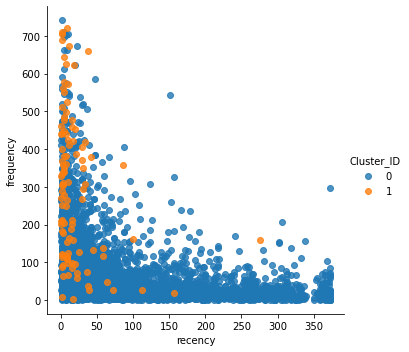

In [39]:
# Create a plot for frequency vs monetary 
facet10 = sns.lmplot(data=X2, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet11 = sns.lmplot(data=X2, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet12 = sns.lmplot(data=X2, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Ans: The diffrence between hierarchial and k-means in this case is that k means can have any number of clusters on the other hand hierarchial has only 2 clusters.

## Evaluate Clustering 

In [40]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [41]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X2)

  silhouette_avg = metrics.silhouette_score(X2, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

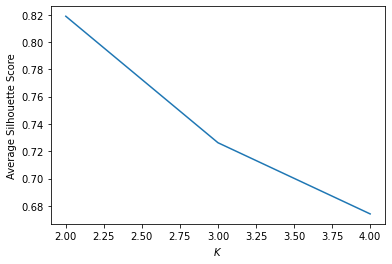

In [42]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()